<h2><b>Họ và tên:</b> Phan Nguyễn Thành Nhân</h2>
<h2><b>MSSV:</b> 19521943</h2>
<h2><b>Lớp:</b> CS116.M12.KHCL</h2>

# Import lib

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 0: Defining hyperparameters

In [22]:
hyper_parameters = {
    "rbf":{
        "C": [0.1, 0.5, 1, 2],
        "degree": [3], # default
        "gamma": ['scale', 'auto'],
        "coef0": [0.0], # default
        "shrinking": [True, False],
        "probability": [True, False],
        "tol": [1e-3, 1e-2, 1e-1, 1],
        "cache_size": [100, 200, 300, 400],
        "verbose": [True, False],
        "max_iter": [1000, 10000],
        "decision_function_shape": ['ovo', 'ovr']
    },
    "linear":{
        "C": [0.1, 0.5, 1, 2],
        "degree": [3], # default
        "gamma": ['scale'], # default
        "coef0": [0.0], # default
        "shrinking": [True, False],
        "probability": [True, False],
        "tol": [1e-3, 1e-2, 1e-1, 1],
        "cache_size": [100, 200, 300, 400],
        "verbose": [True, False],
        "max_iter": [1000, 10000, -1],
        "decision_function_shape": ['ovo', 'ovr']
    },
    "poly":{
        "C": [0.1, 0.5, 1, 2],
        "degree": [0, 1, 2, 3],
        "gamma": ['scale', 'auto'],
        "coef0": [0.0, 1, 2, 3, 4],
        "shrinking": [True, False],
        "probability": [True, False],
        "tol": [1e-3, 1e-2, 1e-1, 1],
        "cache_size": [100, 200, 300, 400],
        "verbose": [True, False],
        "max_iter": [1000, 10000],
        "decision_function_shape": ['ovo', 'ovr']
    },
    "sigmoid":{
        "C": [0.1, 0.5, 1, 2],
        "degree": [3], # default
        "gamma": ['scale', 'auto'],
        "coef0": [0.0, 1, 2, 3, 4],
        "shrinking": [True, False],
        "probability": [True, False],
        "tol": [1e-3, 1e-2, 1e-1, 1],
        "cache_size": [100, 200, 300, 400],
        "verbose": [True, False],
        "max_iter": [1000, 10000,],
        "decision_function_shape": ['ovo', 'ovr']
    },
}

# Step 1: Reading and splitting dataset

In [23]:
!gdown --id 1__ryA6uyYWNW_bO491qQ7iRi0ygaZ0n9 -O Social_Network_Ads.csv

Downloading...
From: https://drive.google.com/uc?id=1__ryA6uyYWNW_bO491qQ7iRi0ygaZ0n9
To: /content/Social_Network_Ads.csv
100% 4.90k/4.90k [00:00<00:00, 8.93MB/s]


In [24]:
data = pd.read_csv('Social_Network_Ads.csv')

In [25]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [27]:
zero_count = 0
one_count = 0
for value in np.array(data.Purchased):
  if value == 1:
    one_count += 1
  elif value == 0:
    zero_count += 1

print(zero_count)
print(one_count)

257
143


In [28]:
X = np.array(data.drop(columns=['Purchased']))
y = np.array(data['Purchased'])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 2: Preprocessing dataset

In [30]:
scaler = StandardScaler()

In [31]:
X_train = scaler.fit_transform(X_train)

# Step 3: Applying grid search to tune hyperparameter

In [ ]:
best_acc = 0
best_params = {}
X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
for kernel in hyper_parameters.keys():
    for C in hyper_parameters[kernel]['C']:
        for degree in hyper_parameters[kernel]['degree']:
            for gamma in hyper_parameters[kernel]['gamma']:
                for coef0 in hyper_parameters[param]['coef0']:
                    for shrinking in hyper_parameters[kernel]['shrinking']:
                        for probability in hyper_parameters[kernel]['probability']:
                            for tol in hyper_parameters[kernel]['tol']:
                                for cache_size in hyper_parameters[kernel]['cache_size']:
                                    for verbose in hyper_parameters[kernel]['verbose']:
                                        for max_iter in hyper_parameters[kernel]['max_iter']:
                                            for decision_function_shape in hyper_parameters[kernel]['decision_function_shape']:
                                              model = SVC(C= C, kernel= kernel, degree= degree,\
                                                          coef0= coef0, shrinking= shrinking, probability= probability,\
                                                          tol= tol, cache_size= cache_size, verbose= verbose,\
                                                          max_iter= max_iter, decision_function_shape= decision_function_shape)
                                              
                                              model.fit(X_train_sub, y_train_sub)
                                              y_pred = model.predict(X_val_sub)
                                              acc_score = accuracy_score(y_val_sub, y_pred)
                                                
                                              if acc_score > best_acc:
                                                  best_acc = acc_score
                                                  best_params = {
                                                      "kernel": kernel, 
                                                      "C": C,
                                                      "degree": degree,
                                                      "gamma": gamma,
                                                      "coef0": coef0,
                                                      "shrinking": shrinking,
                                                      "probability": probability,
                                                      "tol": tol,
                                                      "cache_size": cache_size,
                                                      "verbose": verbose,
                                                      "max_iter": max_iter,
                                                      "decision_function_shape": decision_function_shape
                                                  }

In [37]:
best_params

{'C': 0.5,
 'cache_size': 100,
 'coef0': 0.0,
 'decision_function_shape': 'ovo',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': 1000,
 'probability': True,
 'shrinking': True,
 'tol': 0.01,
 'verbose': True}

# Step 4: Training model with best hyperparameter

In [34]:
model = SVC(C= best_params['C'], kernel= best_params['kernel'], degree= best_params['degree'],\
            coef0= best_params['coef0'], shrinking= best_params['shrinking'], probability= best_params['probability'],\
            tol= best_params['tol'], cache_size= best_params['cache_size'], verbose= best_params['verbose'],\
            max_iter= best_params['max_iter'], decision_function_shape= best_params['decision_function_shape'])

In [35]:
model.fit(X_train, y_train)

[LibSVM]

SVC(C=0.5, cache_size=100, decision_function_shape='ovo', max_iter=1000,
    probability=True, tol=0.01, verbose=True)

# Step 5: Infer and evaluate the model with accuracy measure

In [52]:
X_test = scaler.transform(X_test)

In [54]:
y_pred = model.predict(X_test)

In [55]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [56]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [58]:
def draw_cf_matrix(label, pred):
  cf_matrix = confusion_matrix(label, pred)
  plt.figure(figsize=(10,8))
  ax = plt.subplot()
  sns.heatmap(cf_matrix, annot=True, ax = ax, fmt='g', cmap='Greens')
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels([0, 1])
  ax.yaxis.set_ticklabels([0, 1])
  cf_matrix

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



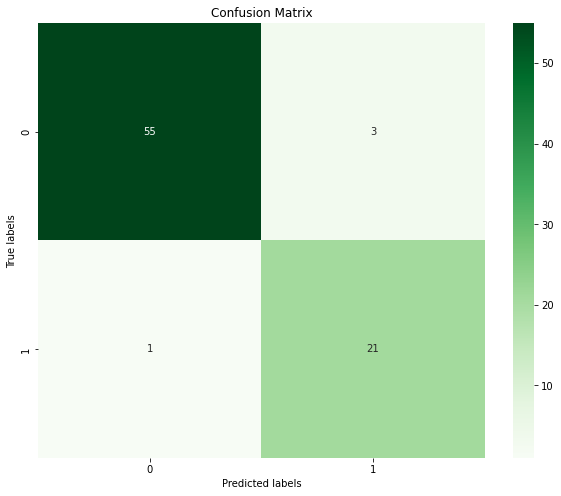

In [59]:
draw_cf_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))